# Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = np.array([[0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    P_Y_1 = len(x_1)
    P_Y_2 = len(x_2)
    P_Y_3 = len(x_3)
    P_Y_4 = len(x_4)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):

      p1 = P_Y_1*np.exp(-0.5*(np.linalg.norm(X_test[i,:]-mean_1))**2)
      p2 = P_Y_2*np.exp(-0.5*(np.linalg.norm(X_test[i,:]-mean_2))**2)
      p3 = P_Y_3*np.exp(-0.5*(np.linalg.norm(X_test[i,:]-mean_3))**2)
      p4 = P_Y_4*np.exp(-0.5*(np.linalg.norm(X_test[i,:]-mean_4))**2)

      eta = np.array([p1, p2, p3, p4])

      threshold_vector = eta.T@L

      Y_test_pred[i] = np.argmin(threshold_vector)+1

    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    P_Y_1 = len(x_1)
    P_Y_2 = len(x_2)
    P_Y_3 = len(x_3)
    P_Y_4 = len(x_4)

    Y_test_pred = np.zeros(X_test.shape[0])

    cov=np.cov(X_train.T,bias=True)
    cov_inv = np.linalg.inv(cov)

    for i in range(X_test.shape[0]):
      p1 = P_Y_1*np.exp(-((X_test[i,:]-mean_1).T@cov_inv)@(X_test[i,:]-mean_1)/2)
      p2 = P_Y_2*np.exp(-((X_test[i,:]-mean_2).T@cov_inv)@(X_test[i,:]-mean_2)/2)
      p3 = P_Y_3*np.exp(-((X_test[i,:]-mean_3).T@cov_inv)@(X_test[i,:]-mean_3)/2)
      p4 = P_Y_4*np.exp(-((X_test[i,:]-mean_4).T@cov_inv)@(X_test[i,:]-mean_4)/2)

      eta = np.array([p1, p2, p3, p4])

      threshold_vector = eta.T@L

      Y_test_pred[i] = np.argmin(threshold_vector)+1

    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):   
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    x_1 = X_train[Y_train==1,:]
    x_2  = X_train[Y_train==2,:]
    x_3 = X_train[Y_train==3,:]
    x_4  = X_train[Y_train==4,:]

    mean_1 = np.mean(x_1,axis=0)
    mean_2 = np.mean(x_2,axis=0)
    mean_3 = np.mean(x_3,axis=0)
    mean_4 = np.mean(x_4,axis=0)

    P_Y_1 = len(x_1)
    P_Y_2 = len(x_2)
    P_Y_3 = len(x_3)
    P_Y_4 = len(x_4)
    
    Y_test_pred = np.zeros(X_test.shape[0])

    cov_1 = np.cov(x_1.T,bias=True)
    cov_1_inv = np.linalg.inv(cov_1)
    det_1 = np.linalg.det(cov_1)
    cov_2 = np.cov(x_2.T,bias=True)
    cov_2_inv = np.linalg.inv(cov_2)
    det_2 = np.linalg.det(cov_2)
    cov_3 = np.cov(x_3.T,bias=True)
    cov_3_inv = np.linalg.inv(cov_3)
    det_3 = np.linalg.det(cov_3)
    cov_4 = np.cov(x_4.T,bias=True)
    cov_4_inv = np.linalg.inv(cov_4)
    det_4 = np.linalg.det(cov_4)

    for i in range(X_test.shape[0]):
      p1 = P_Y_1*(det_1**(-0.5))*np.exp(-((X_test[i,:]-mean_1).T@cov_1_inv)@(X_test[i,:]-mean_1)/2)
      p2 = P_Y_2*(det_2**(-0.5))*np.exp(-((X_test[i,:]-mean_2).T@cov_2_inv)@(X_test[i,:]-mean_2)/2)
      p3 = P_Y_3*(det_3**(-0.5))*np.exp(-((X_test[i,:]-mean_3).T@cov_3_inv)@(X_test[i,:]-mean_3)/2)
      p4 = P_Y_4*(det_4**(-0.5))*np.exp(-((X_test[i,:]-mean_4).T@cov_4_inv)@(X_test[i,:]-mean_4)/2)

      eta = np.array([p1, p2, p3, p4])

      threshold_vector = eta.T@L

      Y_test_pred[i] = np.argmin(threshold_vector)+1

    return Y_test_pred

def calculate_loss(Y_test, Y_pred):
  loss = L[Y_test.astype(int)-1,Y_pred.astype(int)-1]
  loss = np.sum(loss,axis=0)*1.0/len(Y_test)

  return loss

def confusion_matrix(Y_true,Y_pred):
  c_matrix = np.zeros((4,4),dtype=int)

  for i in range(4):
    for j in range(4):
      c_matrix[i][j]  = np.sum((Y_true == i+1) & (Y_pred == j+1))

  return c_matrix

In [3]:
# Testing the above functions

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

Running the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below

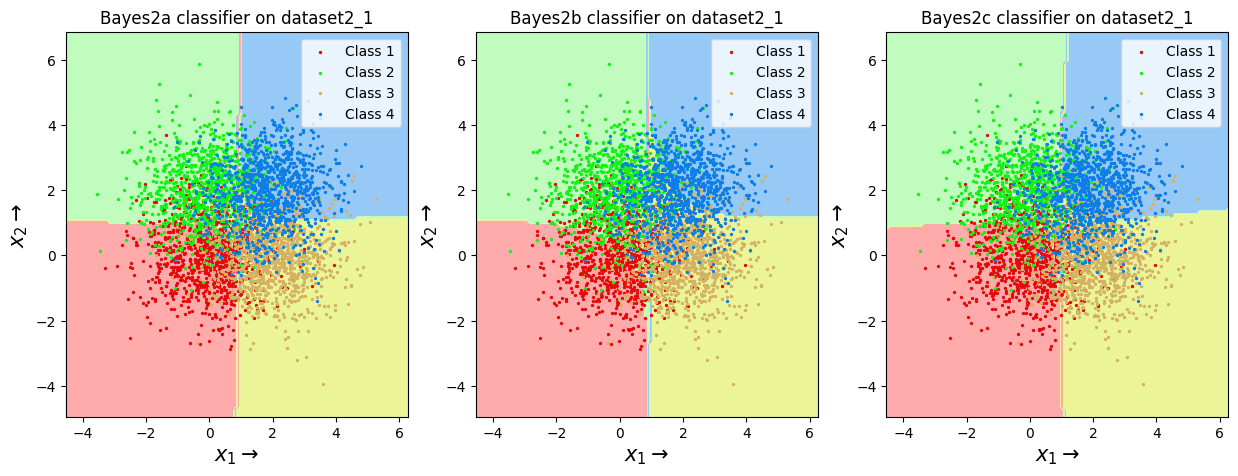

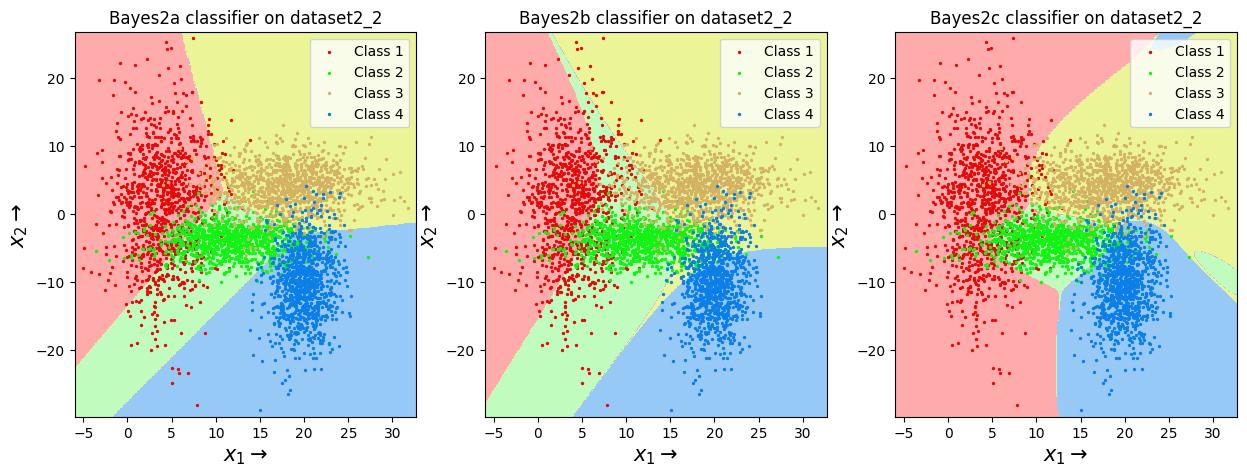

In [4]:
data2_1 = np.load('Data/dataset2_1.npz')
X_train, Y_train, X_test, Y_test = data2_1['arr_0'],data2_1['arr_1'],data2_1['arr_2'],data2_1['arr_3']
Y_pred_12a = Bayes2a(X_train,Y_train,X_test)
loss_12a=calculate_loss(Y_test, Y_pred_12a)
Y_pred_12b = Bayes2b(X_train,Y_train,X_test)
loss_12b=calculate_loss(Y_test, Y_pred_12b)
Y_pred_12c = Bayes2c(X_train,Y_train,X_test)
loss_12c=calculate_loss(Y_test, Y_pred_12c)

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
test_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
Z21a = Bayes2a(X_train,Y_train,test_data)
Z21b = Bayes2b(X_train,Y_train,test_data)
Z21c = Bayes2c(X_train,Y_train,test_data)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.set_title('Bayes2a classifier on dataset2_1')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.contourf(xx,yy,Z21a.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax1.legend()

ax2.set_title('Bayes2b classifier on dataset2_1')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.contourf(xx,yy,Z21b.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax2.legend()


ax3.set_title('Bayes2c classifier on dataset2_1')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(xx,yy,Z21c.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax3.legend()
plt.show()

data2_2 = np.load('Data/dataset2_2.npz')
X_train, Y_train, X_test, Y_test = data2_2['arr_0'],data2_2['arr_1'],data2_2['arr_2'],data2_2['arr_3']
Y_pred_22a = Bayes2a(X_train,Y_train,X_test)
loss_22a=calculate_loss(Y_test, Y_pred_22a)
Y_pred_22b = Bayes2b(X_train,Y_train,X_test)
loss_22b=calculate_loss(Y_test, Y_pred_22b)
Y_pred_22c = Bayes2c(X_train,Y_train,X_test)
loss_22c=calculate_loss(Y_test, Y_pred_22c)

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
test_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
Z22a = Bayes2a(X_train,Y_train,test_data)
Z22b = Bayes2b(X_train,Y_train,test_data)
Z22c = Bayes2c(X_train,Y_train,test_data)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.set_title('Bayes2a classifier on dataset2_2')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.contourf(xx,yy,Z22a.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax1.legend()

ax2.set_title('Bayes2b classifier on dataset2_2')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.contourf(xx,yy,Z22b.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax2.legend()


ax3.set_title('Bayes2c classifier on dataset2_2')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(xx,yy,Z22c.reshape(xx.shape),colors=['#ffabab','#ebf598','#c0fcbd','#97c9f7'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#e40a0a',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#13f214',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='#d4b263',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='#0c7ee8',label='Class 4')
ax3.legend()
plt.show()



**Observations:**

**Expected Loss:**
Classifier | Bayes 2a | Bayes 2b | Bayes 2c  
--- | --- | --- | ---
Dataset2_1 | 0.42975 |  0.45725 | 0.42775
Dataset2_2 |  0.1835 |  0.26025 | 0.14075

The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows :

**Dataset 2_1**

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 633& 219& 136&  12\\ 97& 738&  62& 103\\86&  49& 770&  95\\ 15& 136& 194& 655 \end{bmatrix}$ 
  
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 464& 387& 145&  4\\ 43& 791&  113& 53\\ 40& 95& 818&  47\\4& 149& 346& 501 \end{bmatrix}$ 
 
 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}634& 217& 138&  11\\99& 742& 61& 98\\ 87& 47& 772&  94\\ 15& 134& 201& 650 \end{bmatrix}$ 
 
**Dataset 2_2**

Confusion matrix for Bayes2a : 
$\begin{bmatrix} 830& 150&  18&  2\\ 93& 784&  46& 77\\ 30&  61& 905& 4\\ 0&  23& 78&899\end{bmatrix}$ 
 
Confusion matrix for Bayes2b : 
$\begin{bmatrix} 675& 302& 23&  0\\ 39& 749& 205& 7\\ 7& 118& 875& 0\\ 0& 3& 297& 700 \end{bmatrix}$ 

 
Confusion matrix for Bayes2c : 
$\begin{bmatrix}901&  80&  19& 0\\64& 824& 46& 66\\ 19&  31& 936&  14\\ 0&  36&  48& 916 \end{bmatrix}$ 

Note: The entries are scaled up by 4000 in the above matrices. 

**Observations**

**Bayes 2a**

This classifier assumes all features are independent and have the same variance. Might not perform well if features are highly correlated or have different variances.
This can be observed from the plots.

**Bayes 2b**

This classifier estimates the full covariance matrix Σ, capturing potential correlations between features. Data with potentially correlated features and similar underlying covariance structure across classes is suitable for this classifiers. Since the datasets don't have such covariance  structure, this classifiers performs poorly compared to other classifiers.

**Bayes 2c**

This classifier estimates a separate covariance matrix (Σ_a) for each class, allowing for class-specific feature relationships. Thus it is more flexible and thus performs better than other classifiers. 

**Dataset2_1**

The classes are separated and hence the decision boundaries by the classifiers are same. 

**Dataset2_2**

The class conditional distributions have different covariances across different classes. Thus the classifiers 2a and 2b perform worse compared to 2c as they don't account for the different correlation between the features for different classes.


